Balance Scale Data Set

Data Set Information:

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced.

Attribute Information:

1. Class Name: 3 (L, B, R)
2. Left-Weight: 5 (1, 2, 3, 4, 5)
3. Left-Distance: 5 (1, 2, 3, 4, 5)
4. Right-Weight: 5 (1, 2, 3, 4, 5)
5. Right-Distance: 5 (1, 2, 3, 4, 5)

https://archive.ics.uci.edu/ml/datasets/Balance+Scale



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',sep=',',header=None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
0    625 non-null object
1    625 non-null int64
2    625 non-null int64
3    625 non-null int64
4    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [5]:
data.columns = ['Class','L-Weight','L-Distance','R-Weight','R-Distance']

In [6]:
data.describe()

,L-Weight,L-Distance,R-Weight,R-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [7]:
# checking numbers of unique value in each columns
uni = []
for col in data.columns:
    uni.append(len(np.unique(data[col])))
pd.DataFrame({"columns":data.columns,
             "Unique":uni})

,columns,Unique
0,Class,3
1,L-Weight,5
2,L-Distance,5
3,R-Weight,5
4,R-Distance,5


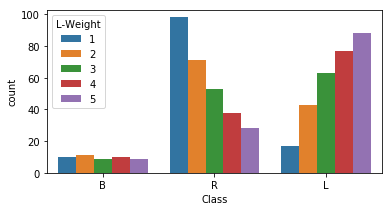

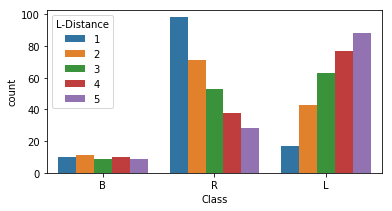

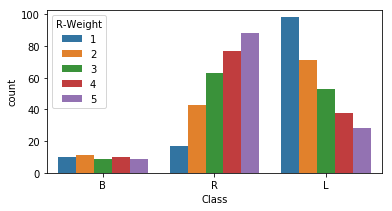

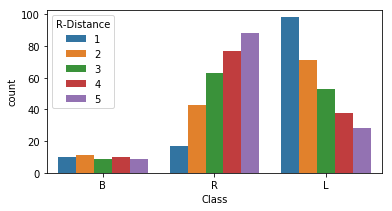

In [8]:
for col in ['L-Weight','L-Distance','R-Weight','R-Distance']:
    plt.figure(figsize=(6,3))
    sns.countplot(x='Class',data=data,hue=col)

In [9]:
pd.crosstab(index=data['Class'],columns='Count')

col_0,Count
Class,
B,49
L,288
R,288


In [10]:
pd.crosstab(index=data['Class'],columns=data['L-Weight'])

L-Weight,1,2,3,4,5
Class,,,,,
B,10,11,9,10,9
L,17,43,63,77,88
R,98,71,53,38,28


In [11]:
pd.crosstab(index=data['Class'],columns=data['L-Weight'],normalize='columns',margins=True)

L-Weight,1,2,3,4,5,All
Class,,,,,,
B,0.080,0.088,0.072,0.080,0.072,0.0784
L,0.136,0.344,0.504,0.616,0.704,0.4608
R,0.784,0.568,0.424,0.304,0.224,0.4608


In [12]:
numerical_data = data.select_dtypes(exclude=[object])

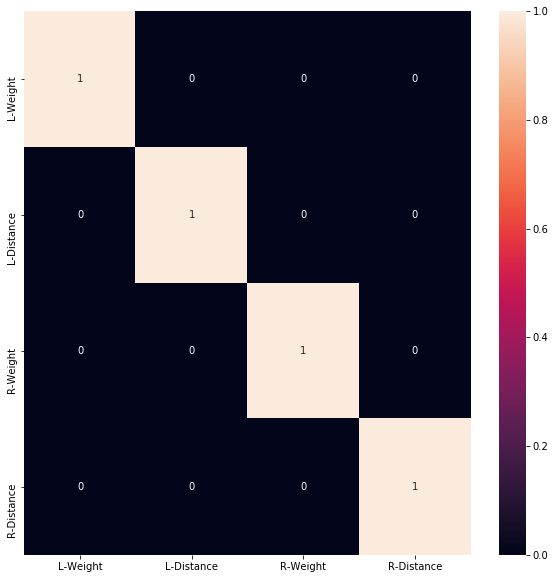

In [13]:
balance_scale_corr = numerical_data.corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(balance_scale_corr,annot=True)

In [14]:
X = data.drop(['Class'],axis=1)
y = data['Class']

In [15]:
print(X.shape , y.shape)

(625, 4) (625,)


In [16]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [17]:
np.unique(y)

array([0, 1, 2])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [20]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(500, 4) (125, 4)
(500,) (125,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
from sklearn.model_selection import GridSearchCV

In [27]:
classifiers = {'models':[LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         GradientBoostingClassifier(),
                         AdaBoostClassifier(),
                         SVC(),
                         KNeighborsClassifier(),
                         XGBClassifier()],
               'hyperparameters':[
                   {
                       'logisticregression__penalty':['l1','l2'],
                       'logisticregression__fit_intercept':[True,False],
                   },
                   {
                        'decisiontreeclassifier__criterion' : ['gini','entropy'],
                        'decisiontreeclassifier__splitter' : ['best','random'],
                        'decisiontreeclassifier__max_depth' : [1,2,3,4],
                        'decisiontreeclassifier__max_features' : ['auto','sqrt','log2']
                    },
                   {
                        'randomforestclassifier__criterion':['gini','entropy'],
                        'randomforestclassifier__max_depth': [3,4,5],
                        'randomforestclassifier__max_features': ['auto','sqrt','log2'],
                        'randomforestclassifier__bootstrap':[True,False],
                        'randomforestclassifier__n_jobs':[-1]
                    },
                   {
                        'gradientboostingclassifier__loss':['deviance'],
                        'gradientboostingclassifier__learning_rate':[0.01,0.1,0.5,1.0],
                        'gradientboostingclassifier__criterion':['friedman_mse','mse','mae']
                    },
                   {
                        'adaboostclassifier__n_estimators':[10,50,100,200],
                        'adaboostclassifier__learning_rate':[0.01,0.1,1,2],
                        'adaboostclassifier__algorithm':['SAMME', 'SAMME.R']
                    },
                   {
                       'svc__C': [0.001, 0.01, 0.1, 1, 10],
                   },
                   {
                       'kneighborsclassifier__n_neighbors':[2,5,10,20],
                       'kneighborsclassifier__weights':['uniform','distance'],
                       'kneighborsclassifier__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
                   },
                   {
                       'xgbclassifier__max_depth':[1,2,3,5],
                       'xgbclassifier__learning_rate':[0.01,0.1,1],
                       'xgbclassifier__booster':['gbtree', 'gblinear' , 'dart']
                   }

               ]}

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
for n in range(len(classifiers['models'])):
    #print(classifiers['hyperparameters'][n])
    pipeline = make_pipeline(StandardScaler(),(classifiers['models'][n]))
    model = GridSearchCV(pipeline,(classifiers['hyperparameters'][n]), cv=10)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model.best_params_)
    print(r2_score(y_test,pred))
    print(mean_squared_error(y_test,pred))

{'logisticregression__fit_intercept': False, 'logisticregression__penalty': 'l1'}
0.3918261433668504
0.24


/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__max_features': 'log2', 'decisiontreeclassifier__splitter': 'best'}
-0.1352578657152126
0.448


/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'randomforestclassifier__bootstrap': True, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__n_jobs': -1}
0.04719429127473229
0.376


/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gradientboostingclassifier__criterion': 'friedman_mse', 'gradientboostingclassifier__learning_rate': 1.0, 'gradientboostingclassifier__loss': 'deviance'}
-0.3582549464807008
0.536


/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'adaboostclassifier__algorithm': 'SAMME.R', 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 200}
0.5134609146934803
0.192


/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'svc__C': 10}
0.6756406097956535
0.128


/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'kneighborsclassifier__algorithm': 'brute', 'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'distance'}
-0.23662017515407086
0.488
{'xgbclassifier__booster': 'gbtree', 'xgbclassifier__learning_rate': 1, 'xgbclassifier__max_depth': 1}
0.45264352903016536
0.216


/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
